In [1]:
library(ggplot2)
library(dplyr)
library(ggthemes)
library(corrgram)
library(corrplot)
library(caTools)
library(plotly)
set.seed(101)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.84 loaded


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout




In [2]:
df <- read.csv("student-mat.csv",sep=";")

In [3]:
print(head(df))
print(summary(df))

  school sex age address famsize Pstatus Medu Fedu     Mjob     Fjob     reason
1     GP   F  18       U     GT3       A    4    4  at_home  teacher     course
2     GP   F  17       U     GT3       T    1    1  at_home    other     course
3     GP   F  15       U     LE3       T    1    1  at_home    other      other
4     GP   F  15       U     GT3       T    4    2   health services       home
5     GP   F  16       U     GT3       T    3    3    other    other       home
6     GP   M  16       U     LE3       T    4    3 services    other reputation
  guardian traveltime studytime failures schoolsup famsup paid activities
1   mother          2         2        0       yes     no   no         no
2   father          1         2        0        no    yes   no         no
3   mother          1         2        3       yes     no  yes         no
4   mother          1         3        0        no    yes  yes        yes
5   father          1         2        0        no    yes  yes        

In [4]:
if(any(is.na(df))==T){
  print("Na values are there!")
} else {
  print("No Na values :)")
}

[1] "No Na values :)"


In [5]:
num.cols <- sapply(df,is.numeric)
cor.data <- cor(df[,num.cols])
print(cor.data)

                    age         Medu         Fedu   traveltime    studytime
age         1.000000000 -0.163658419 -0.163438069  0.070640721 -0.004140037
Medu       -0.163658419  1.000000000  0.623455112 -0.171639305  0.064944137
Fedu       -0.163438069  0.623455112  1.000000000 -0.158194054 -0.009174639
traveltime  0.070640721 -0.171639305 -0.158194054  1.000000000 -0.100909119
studytime  -0.004140037  0.064944137 -0.009174639 -0.100909119  1.000000000
failures    0.243665377 -0.236679963 -0.250408444  0.092238746 -0.173563031
famrel      0.053940096 -0.003914458 -0.001369727 -0.016807986  0.039730704
freetime    0.016434389  0.030890867 -0.012845528 -0.017024944 -0.143198407
goout       0.126963880  0.064094438  0.043104668  0.028539674 -0.063903675
Dalc        0.131124605  0.019834099  0.002386429  0.138325309 -0.196019263
Walc        0.117276052 -0.047123460 -0.012631018  0.134115752 -0.253784731
health     -0.062187369 -0.046877829  0.014741537  0.007500606 -0.075615863
absences    

                    age         Medu         Fedu   traveltime    studytime
age         1.000000000 -0.163658419 -0.163438069  0.070640721 -0.004140037
Medu       -0.163658419  1.000000000  0.623455112 -0.171639305  0.064944137
Fedu       -0.163438069  0.623455112  1.000000000 -0.158194054 -0.009174639
traveltime  0.070640721 -0.171639305 -0.158194054  1.000000000 -0.100909119
studytime  -0.004140037  0.064944137 -0.009174639 -0.100909119  1.000000000
failures    0.243665377 -0.236679963 -0.250408444  0.092238746 -0.173563031
famrel      0.053940096 -0.003914458 -0.001369727 -0.016807986  0.039730704
freetime    0.016434389  0.030890867 -0.012845528 -0.017024944 -0.143198407
goout       0.126963880  0.064094438  0.043104668  0.028539674 -0.063903675
Dalc        0.131124605  0.019834099  0.002386429  0.138325309 -0.196019263
Walc        0.117276052 -0.047123460 -0.012631018  0.134115752 -0.253784731
health     -0.062187369 -0.046877829  0.014741537  0.007500606 -0.075615863
absences    

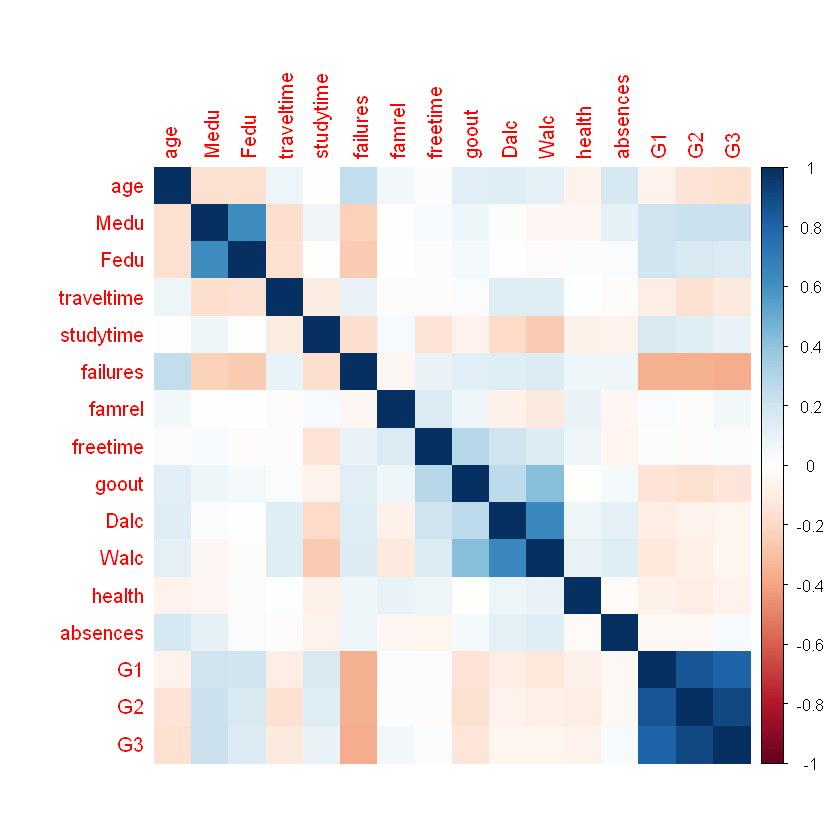

In [6]:
print(corrplot(cor.data,method="color"))

                    age         Medu         Fedu   traveltime    studytime
age         1.000000000 -0.163658419 -0.163438069  0.070640721 -0.004140037
Medu       -0.163658419  1.000000000  0.623455112 -0.171639305  0.064944137
Fedu       -0.163438069  0.623455112  1.000000000 -0.158194054 -0.009174639
traveltime  0.070640721 -0.171639305 -0.158194054  1.000000000 -0.100909119
studytime  -0.004140037  0.064944137 -0.009174639 -0.100909119  1.000000000
failures    0.243665377 -0.236679963 -0.250408444  0.092238746 -0.173563031
famrel      0.053940096 -0.003914458 -0.001369727 -0.016807986  0.039730704
freetime    0.016434389  0.030890867 -0.012845528 -0.017024944 -0.143198407
goout       0.126963880  0.064094438  0.043104668  0.028539674 -0.063903675
Dalc        0.131124605  0.019834099  0.002386429  0.138325309 -0.196019263
Walc        0.117276052 -0.047123460 -0.012631018  0.134115752 -0.253784731
health     -0.062187369 -0.046877829  0.014741537  0.007500606 -0.075615863
absences    

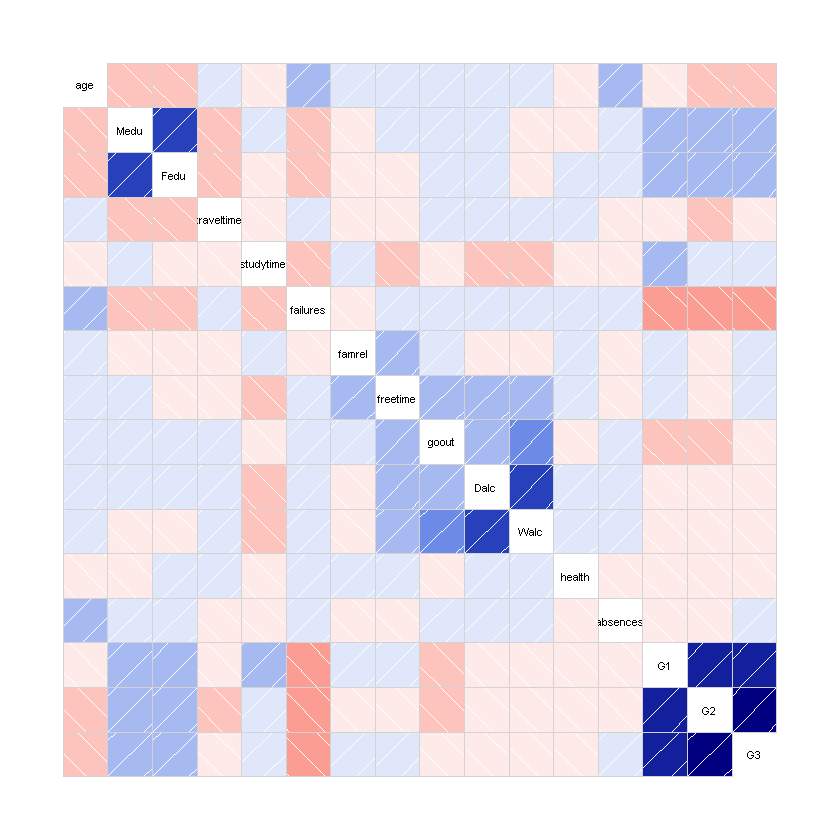

In [7]:
print(corrgram(df))

              failures   traveltime          age       health        goout
failures    1.00000000  0.092238746  0.243665377  0.065827282  0.124560922
traveltime  0.09223875  1.000000000  0.070640721  0.007500606  0.028539674
age         0.24366538  0.070640721  1.000000000 -0.062187369  0.126963880
health      0.06582728  0.007500606 -0.062187369  1.000000000 -0.009577254
goout       0.12456092  0.028539674  0.126963880 -0.009577254  1.000000000
Walc        0.14196203  0.134115752  0.117276052  0.092476317  0.420385745
Dalc        0.13604693  0.138325309  0.131124605  0.077179582  0.266993848
absences    0.06372583 -0.012943775  0.175230079 -0.029936711  0.044302220
freetime    0.09198747 -0.017024944  0.016434389  0.075733357  0.285018715
Fedu       -0.25040844 -0.158194054 -0.163438069  0.014741537  0.043104668
Medu       -0.23667996 -0.171639305 -0.163658419 -0.046877829  0.064094438
G3         -0.36041494 -0.117142053 -0.161579438 -0.061334605 -0.132791474
G2         -0.35589563 -0

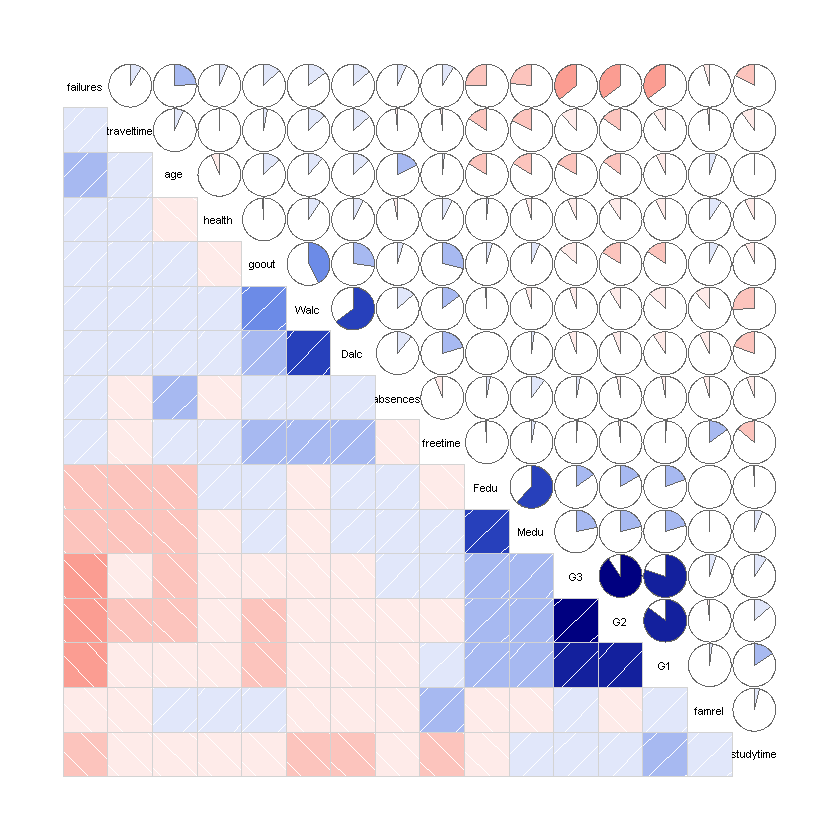

In [8]:
print(corrgram(df,order=T,lower.panel = panel.shade,
               upper.panel = panel.pie,text.panel = panel.txt))

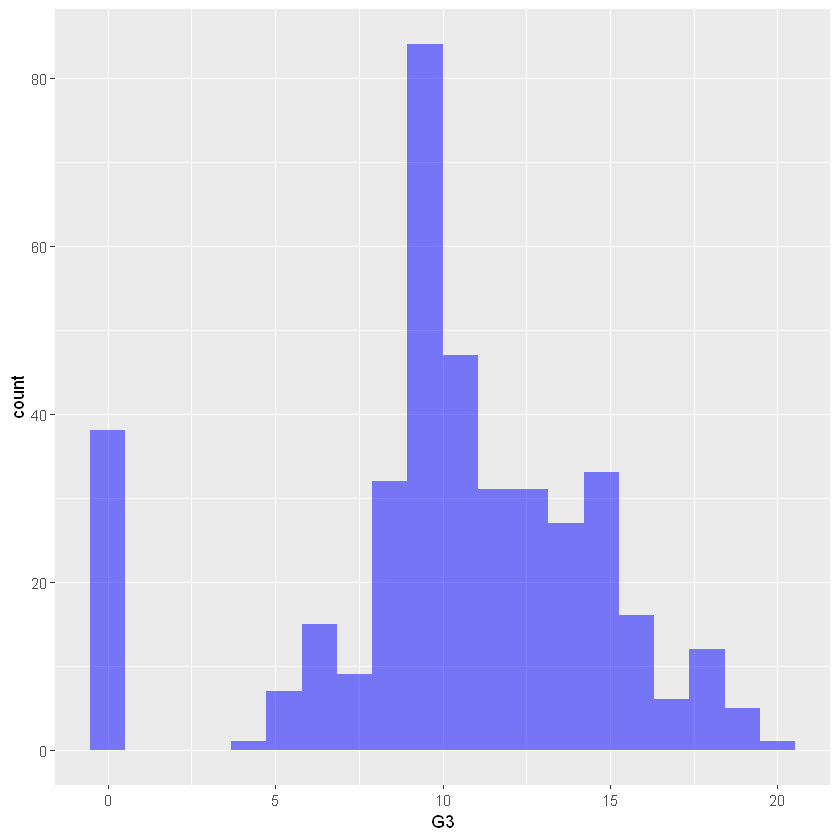

In [9]:
r <- ggplot(df,aes(x=G3))+geom_histogram(bins=20,
                                         alpha=0.5,fill="blue")

print(r)

In [10]:
sample <- sample.split(df$G3,SplitRatio=0.7)
train <- subset(df,sample==T)
test <- subset(df,sample==F)

In [11]:
model <- lm(G3 ~ . , train)

In [12]:
print(summary(model))


Call:
lm(formula = G3 ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4250 -0.6478  0.2844  1.0442  4.9840 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.70763    2.69488   1.376  0.17019    
schoolMS          0.66981    0.47436   1.412  0.15926    
sexM              0.25730    0.29257   0.879  0.38006    
age              -0.36163    0.12949  -2.793  0.00566 ** 
addressU          0.08123    0.35652   0.228  0.81996    
famsizeLE3        0.12222    0.28709   0.426  0.67070    
PstatusT          0.06807    0.43032   0.158  0.87444    
Medu              0.11100    0.18757   0.592  0.55455    
Fedu             -0.16373    0.15928  -1.028  0.30503    
Mjobhealth       -0.63993    0.65314  -0.980  0.32820    
Mjobother        -0.15730    0.42323  -0.372  0.71048    
Mjobservices     -0.15872    0.46682  -0.340  0.73415    
Mjobteacher      -0.04930    0.62335  -0.079  0.93702    
Fjobhealth        0.17565    0.83034 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



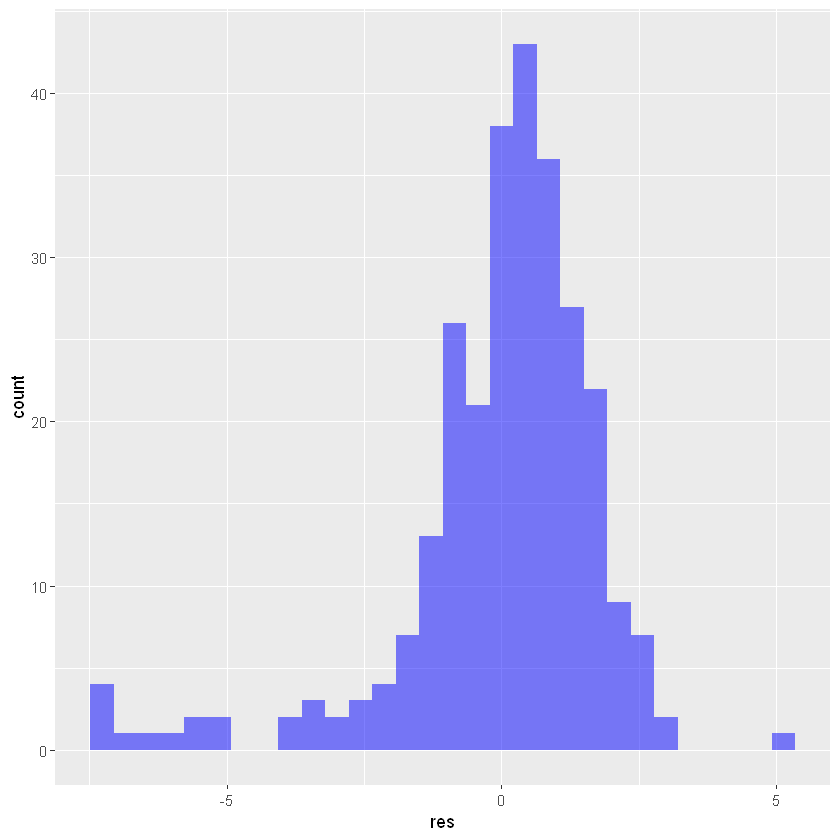

In [13]:
res <- residuals(model)
res <- as.data.frame(res)
pl <- ggplot(res,aes(res))+geom_histogram(fill="blue",alpha=0.5)
print(pl)

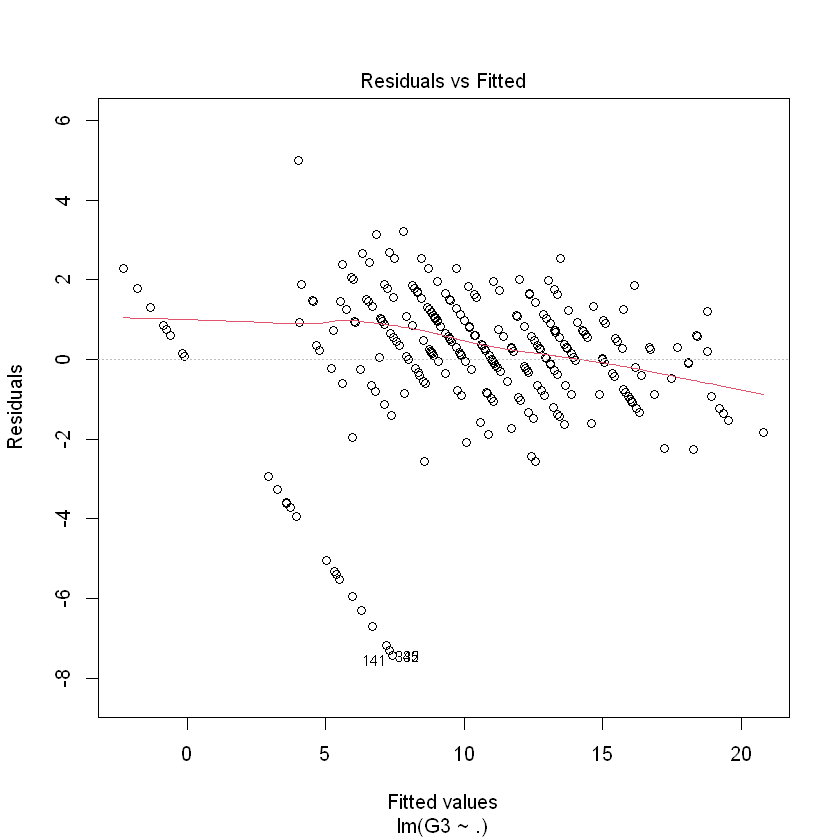

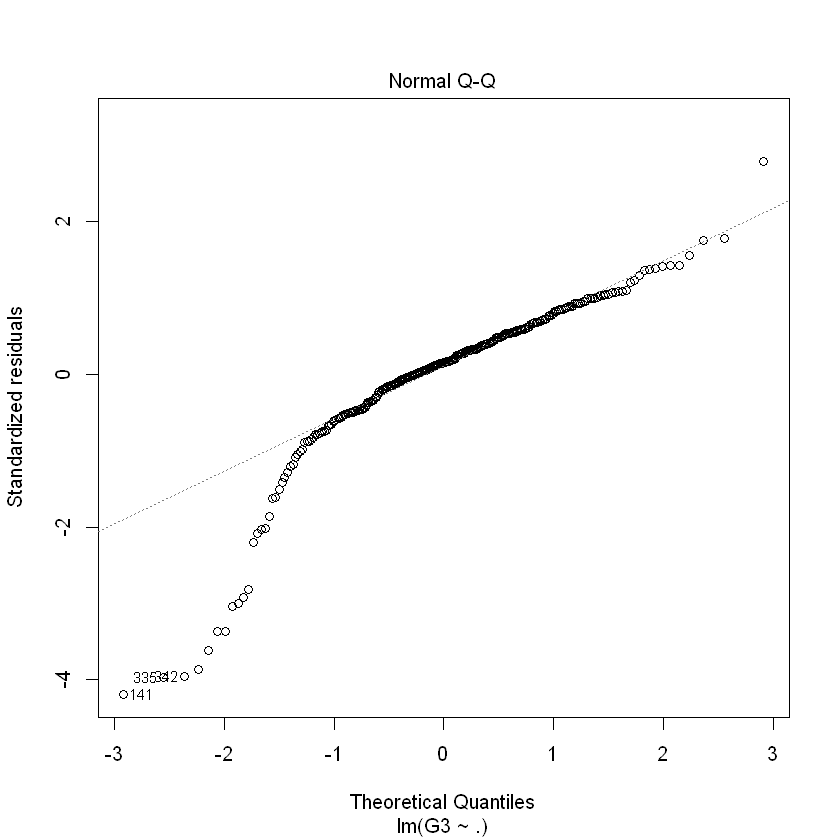

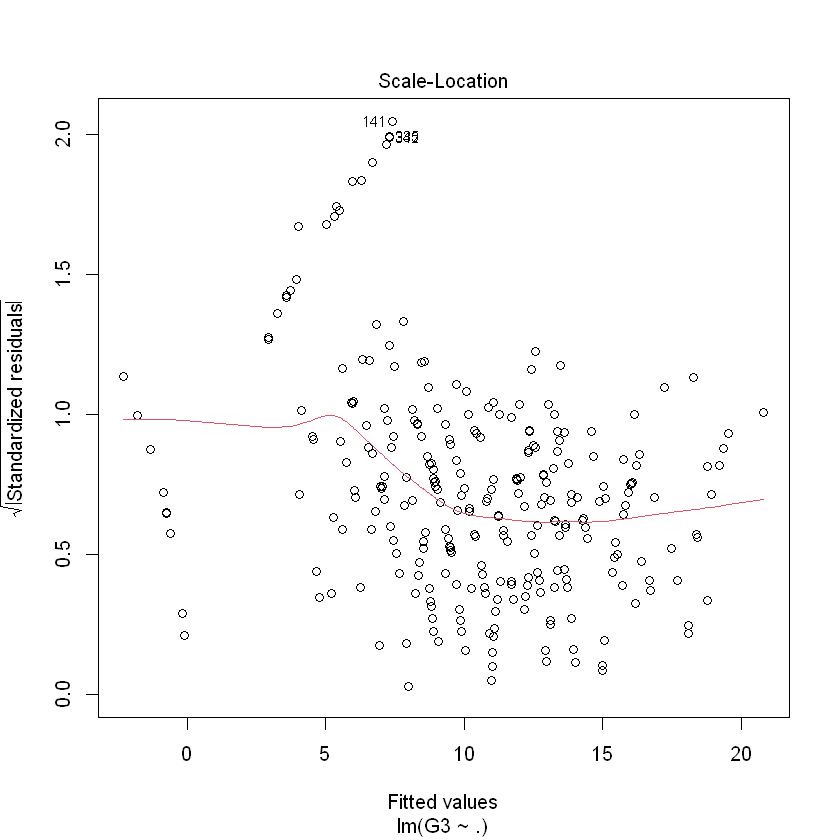

NULL


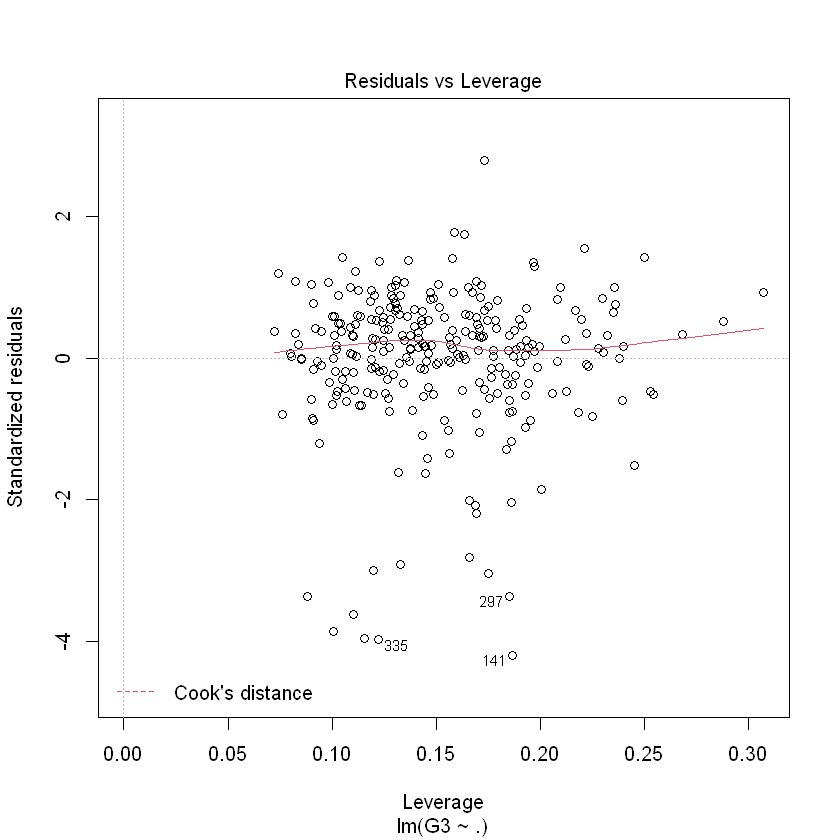

In [14]:
print(plot(model))

In [15]:

G3.predictons <- predict(model,test)

results <- cbind(G3.predictons,test$G3)
colnames(results) <- c('Predictions','Original')
results <- as.data.frame(results)
print(head(results))

mse <- mean((results$Original-results$Predictions)^2)
cat("MSE:",mse," ")
cat("RMSE:",mse^0.5," ")

SSE = sum((results$Predictions - results$Original)^2)
SST = sum( (mean(df$G3) - results$Original)^2)

R2 = 1 - SSE/SST
#R2
cat("R2: ",R2," ")

   Predictions Original
4    12.682507       15
5     9.433677       10
7    11.312310       11
8     3.101530        6
10   15.564674       15
13   14.190360       14
MSE: 4.123811  RMSE: 2.030717  R2:  0.7979743  

In [16]:
to_zero <- function(x){
  if (x<0){
    return(0)
  } else{
    return(x)
  }
} 

results$Predictions <- sapply(results$Predictions,to_zero)
mse <- mean((results$Original-results$Predictions)^2)
cat("MSE:",mse," ")
cat("RMSE:",mse^0.5," ")

SSE = sum((results$Predictions - results$Original)^2)
SST = sum( (mean(df$G3) - results$Original)^2)

R2 = 1 - SSE/SST
#R2
cat("R2: ",R2," ")

MSE: 3.991675  RMSE: 1.997918  R2:  0.8044477  